# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** M. Sibawaihi Shiddiq Tarigan
- **Email:** tibbitarigan@gmail.com
- **ID Dicoding:** shiddiq_tarigan

## Menentukan Pertanyaan Bisnis
Berdasarkan eksplorasi awal terhadap E-Commerce Public Dataset, saya telah mengidentifikasi 3 pertanyaan bisnis yang krusial untuk dijawab:

### Pertanyaan 1: Customer Satisfaction & Delivery Performance
**"Bagaimana hubungan antara ketepatan waktu pengiriman (delivery performance) dengan tingkat kepuasan pelanggan (review score)? Apakah keterlambatan pengiriman berpengaruh signifikan terhadap review yang diberikan?"**

Pertanyaan ini penting karena:
- Delivery experience adalah touchpoint terakhir dalam customer journey
- Review score mempengaruhi brand reputation dan future sales
- Understanding faktor yang mempengaruhi satisfaction dapat improve operational strategy

### Pertanyaan 2: RFM Analysis - Customer Segmentation
**"Bagaimana segmentasi pelanggan berdasarkan RFM Analysis (Recency, Frequency, Monetary)? Siapa pelanggan terbaik yang perlu dipertahankan dan segmen mana yang perlu ditingkatkan engagement-nya?"**

Pertanyaan ini penting karena:
- Customer segmentation memungkinkan personalized marketing strategy
- Identifikasi high-value customers untuk retention programs
- Opportunity untuk recover at-risk customers sebelum churn

### Pertanyaan 3: Geospatial Analysis - Revenue Distribution
**"Bagaimana distribusi geografis dari revenue dan customer density di Brazil? State mana yang paling menguntungkan dan mana yang memiliki potensi growth tertinggi?"**

Pertanyaan ini penting karena:
- Geographic expansion strategy membutuhkan data-driven insights
- Identifikasi market concentration risk
- Discovery underserved markets dengan high potential

## Import Semua Packages/Library yang Digunakan

In [36]:
# Import semua library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Konfigurasi
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Konfigurasi untuk visualisasi yang lebih baik
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Data Wrangling

### Gathering Data

In [37]:
# Load semua dataset
customers_df = pd.read_csv('data/customers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
products_df = pd.read_csv('data/products_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')

# Informasi ukuran setiap dataset
datasets_info = {
    'Customers': customers_df.shape,
    'Geolocation': geolocation_df.shape,
    'Order Items': order_items_df.shape,
    'Order Payments': order_payments_df.shape,
    'Order Reviews': order_reviews_df.shape,
    'Orders': orders_df.shape,
    'Product Category Translation': product_category_df.shape,
    'Products': products_df.shape,
    'Sellers': sellers_df.shape
}

print("\nUkuran Dataset (Rows, Columns):")
for name, shape in datasets_info.items():
    print(f"{name:.<35} {shape[0]:>8,} rows × {shape[1]:>2} columns")


Ukuran Dataset (Rows, Columns):
Customers..........................   99,441 rows ×  5 columns
Geolocation........................ 1,000,163 rows ×  5 columns
Order Items........................  112,650 rows ×  7 columns
Order Payments.....................  103,886 rows ×  5 columns
Order Reviews......................   99,224 rows ×  7 columns
Orders.............................   99,441 rows ×  8 columns
Product Category Translation.......       71 rows ×  2 columns
Products...........................   32,951 rows ×  9 columns
Sellers............................    3,095 rows ×  4 columns


In [38]:
# Fungsi untuk menampilkan informasi dataset dengan rapi
def display_dataset_info(df, name):
    print(f"Dataset: {name}")
    print(f"\nshape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    print("Columns info:")
    print(df.info())
    print("First 3 rows:")
    print(df.head(3))

# tampilkan info untuk dataset utama
print("Explorasi struktur dataset")
print("\n")

display_dataset_info(orders_df, "Orders Dataset")
display_dataset_info(customers_df, "Customers Dataset")
display_dataset_info(order_items_df, "Order Items Dataset")
display_dataset_info(products_df, "Products Dataset")
display_dataset_info(order_payments_df, "Order Payments Dataset")
display_dataset_info(order_reviews_df, "Order Reviews Dataset")

Explorasi struktur dataset


Dataset: Orders Dataset

shape: 99441 rows × 8 columns

Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
First 3 rows:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  

**Insight:**
- Dataset terdiri dari 9 file CSV dengan total 99,441 orders dari periode September 2016 hingga Agustus 2018
- Orders dataset memiliki 8 kolom dengan informasi timestamp lengkap untuk tracking delivery performance
- Order items berisi 112,650 baris yang menunjukkan bahwa beberapa order memiliki multiple items
- Products dataset memiliki missing values pada product_category_name (610 rows) yang perlu ditangani
- Reviews dataset memiliki 99,224 reviews dengan 814 duplicate entries yang perlu dibersihkan
- Semua dataset memiliki key columns (order_id, customer_id, product_id, seller_id) untuk di-merge

### Assessing Data

In [39]:
print("ASSESSING DATA - ANALISIS MISSING VALUES")
def check_missing_values(df, name):
    print(f"\n{name}:")
    print("-" * 80)
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Percentage': missing_percent
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        print(missing_df.to_string())
    else:
        print("No missing values found!")
    return missing_df

# Check missing values untuk semua dataset
datasets = {
    'Orders': orders_df,
    'Order Items': order_items_df,
    'Order Payments': order_payments_df,
    'Order Reviews': order_reviews_df,
    'Customers': customers_df,
    'Products': products_df,
    'Sellers': sellers_df,
    'Product Category': product_category_df,
    'Geolocation': geolocation_df
}

missing_summary = {}
for name, df in datasets.items():
    missing_summary[name] = check_missing_values(df, name)


ASSESSING DATA - ANALISIS MISSING VALUES

Orders:
--------------------------------------------------------------------------------
                               Missing Count  Percentage
order_delivered_customer_date           2965    2.981668
order_delivered_carrier_date            1783    1.793023
order_approved_at                        160    0.160899

Order Items:
--------------------------------------------------------------------------------
No missing values found!

Order Payments:
--------------------------------------------------------------------------------
No missing values found!

Order Reviews:
--------------------------------------------------------------------------------
                        Missing Count  Percentage
review_comment_title            87656   88.341530
review_comment_message          58247   58.702532

Customers:
--------------------------------------------------------------------------------
No missing values found!

Products:
----------------------

In [40]:
print("ASSESSING DATA - ANALISIS TIPE DATA & DUPLIKASI")
# 1. Cek duplikasi
print("\n1. DUPLIKASI DATA:")
print("-" * 80)
duplicate_analysis = {
    'Orders': orders_df.duplicated(subset=['order_id']).sum(),
    'Order Items': order_items_df.duplicated().sum(),
    'Customers': customers_df.duplicated(subset=['customer_id']).sum(),
    'Products': products_df.duplicated(subset=['product_id']).sum(),
    'Sellers': sellers_df.duplicated(subset=['seller_id']).sum(),
    'Order Reviews': order_reviews_df.duplicated(subset=['review_id']).sum(),
    'Order Payments': order_payments_df.duplicated().sum()
}

for name, count in duplicate_analysis.items():
    status = "No duplicates" if count == 0 else f"⚠ {count} duplicates found"
    print(f"{name:.<40} {status}")

# 2. Analisis kolom tanggal yang masih object
print("\n\n2. KOLOM TANGGAL YANG PERLU DIKONVERSI:")
print("-" * 80)
date_columns = {
    'orders_df': ['order_purchase_timestamp', 'order_approved_at', 
                  'order_delivered_carrier_date', 'order_delivered_customer_date',
                  'order_estimated_delivery_date'],
    'order_reviews_df': ['review_creation_date', 'review_answer_timestamp']
}

for df_name, cols in date_columns.items():
    print(f"\n{df_name}:")
    for col in cols:
        print(f"  - {col}: {eval(df_name)[col].dtype}")

# 3. Statistik order status
print("\n\n3. DISTRIBUSI ORDER STATUS:")
print("-" * 80)
status_dist = orders_df['order_status'].value_counts()
print(status_dist)

# 4. Statistik payment type
print("\n\n4. DISTRIBUSI PAYMENT TYPE:")
print("-" * 80)
payment_dist = order_payments_df['payment_type'].value_counts()
print(payment_dist)

# 5. Statistik review score
print("\n\n5. DISTRIBUSI REVIEW SCORE:")
review_dist = order_reviews_df['review_score'].value_counts().sort_index()
print(review_dist)

ASSESSING DATA - ANALISIS TIPE DATA & DUPLIKASI

1. DUPLIKASI DATA:
--------------------------------------------------------------------------------
Orders.................................. No duplicates
Order Items............................. No duplicates
Customers............................... No duplicates
Products................................ No duplicates
Sellers................................. No duplicates
Order Reviews........................... ⚠ 814 duplicates found
Order Payments.......................... No duplicates


2. KOLOM TANGGAL YANG PERLU DIKONVERSI:
--------------------------------------------------------------------------------

orders_df:
  - order_purchase_timestamp: object
  - order_approved_at: object
  - order_delivered_carrier_date: object
  - order_delivered_customer_date: object
  - order_estimated_delivery_date: object

order_reviews_df:
  - review_creation_date: object
  - review_answer_timestamp: object


3. DISTRIBUSI ORDER STATUS:
------------

**Insight:**
- **Missing Values**: Orders memiliki missing values pada delivery dates (normal untuk cancelled orders), Products memiliki 610 missing categories, Reviews memiliki banyak missing comments (optional field)
- **Duplicates**: Ditemukan 814 duplicate reviews yang perlu dihapus untuk analisis yang akurat
- **Data Types**: Semua kolom tanggal masih bertipe object dan perlu dikonversi ke datetime untuk time-series analysis
- **Order Status**: 96,478 (97%) orders delivered successfully, sisanya cancelled/unavailable
- **Payment Methods**: Credit card dominan (76,795), diikuti boleto (19,784)
- **Review Distribution**: Mayoritas reviews positif (57,328 score 5), hanya 11,424 score 1

### Cleaning Data

In [41]:
print("DATA CLEANING")
# 1. Convert date columns to datetime
print("\n1. KONVERSI KOLOM TANGGAL KE DATETIME:")
print("-" * 80)

date_cols_orders = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date']

for col in date_cols_orders:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')
    print(f"{col} converted to datetime")

date_cols_reviews = ['review_creation_date', 'review_answer_timestamp']
for col in date_cols_reviews:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col], errors='coerce')
    print(f"{col} converted to datetime")

# 2. Handle duplicates in reviews
print("\n\n2. MENANGANI DUPLIKASI DI ORDER REVIEWS:")
print("-" * 80)
print(f"Jumlah baris sebelum: {len(order_reviews_df):,}")
order_reviews_df = order_reviews_df.drop_duplicates(subset=['review_id'], keep='first')
print(f"Jumlah baris sesudah: {len(order_reviews_df):,}")
print(f" {814} duplicate reviews removed")

# 3. Merge products with category translation
print("\n\n3. MERGE PRODUCTS DENGAN CATEGORY TRANSLATION:")
print("-" * 80)
products_df = products_df.merge(product_category_df, on='product_category_name', how='left')
print(f"Products merged with category translation")
print(f"Kolom baru: product_category_name_english")
print(f"\nSample kategori:")
print(products_df[['product_category_name', 'product_category_name_english']].head(10))


DATA CLEANING

1. KONVERSI KOLOM TANGGAL KE DATETIME:
--------------------------------------------------------------------------------
order_purchase_timestamp converted to datetime
order_approved_at converted to datetime
order_delivered_carrier_date converted to datetime
order_delivered_customer_date converted to datetime
order_estimated_delivery_date converted to datetime
review_creation_date converted to datetime
review_answer_timestamp converted to datetime


2. MENANGANI DUPLIKASI DI ORDER REVIEWS:
--------------------------------------------------------------------------------
Jumlah baris sebelum: 99,224
Jumlah baris sesudah: 98,410
 814 duplicate reviews removed


3. MERGE PRODUCTS DENGAN CATEGORY TRANSLATION:
--------------------------------------------------------------------------------
Products merged with category translation
Kolom baru: product_category_name_english

Sample kategori:
   product_category_name product_category_name_english
0             perfumaria          

In [42]:
print("MEMBUAT MAIN DATAFRAME")

# Merge semua dataset menjadi satu dataframe utama
# Start dengan orders
main_df = orders_df.copy()
print(f"Starting with orders: {main_df.shape}")

# Merge dengan customers
main_df = main_df.merge(customers_df, on='customer_id', how='left')
print(f"Merged with customers: {main_df.shape}")

# Merge dengan order_items
main_df = main_df.merge(order_items_df, on='order_id', how='left')
print(f"Merged with order_items: {main_df.shape}")
# Merge dengan products
main_df = main_df.merge(products_df, on='product_id', how='left')
print(f"Merged with products: {main_df.shape}")

# Merge dengan sellers
main_df = main_df.merge(sellers_df, on='seller_id', how='left')
print(f"Merged with sellers: {main_df.shape}")

# Merge dengan order_reviews
main_df = main_df.merge(order_reviews_df, on='order_id', how='left')
print(f"Merged with reviews: {main_df.shape}")

# Create aggregated payment info per order
payment_agg = order_payments_df.groupby('order_id').agg({
    'payment_type': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],
    'payment_installments': 'max',
    'payment_value': 'sum'
}).reset_index()

payment_agg.columns = ['order_id', 'payment_type', 'payment_installments', 'total_payment']

# Merge dengan payment
main_df = main_df.merge(payment_agg, on='order_id', how='left')
print(f"Merged with payments: {main_df.shape}")

print("\n" + "-" * 80)
print("STRUKTUR MAIN DATAFRAME:")
print("-" * 80)
print(f"Total rows: {main_df.shape[0]:,}")
print(f"Total columns: {main_df.shape[1]}")
print(f"\nColumn names:")
for i, col in enumerate(main_df.columns, 1):
    print(f"{i:2d}. {col}")

print("SAMPLE DATA:")
print(main_df.head(3))

MEMBUAT MAIN DATAFRAME
Starting with orders: (99441, 8)
Merged with customers: (99441, 12)
Merged with order_items: (113425, 18)
Merged with products: (113425, 27)
Merged with sellers: (113425, 30)
Merged with reviews: (113727, 36)
Merged with payments: (113727, 39)

--------------------------------------------------------------------------------
STRUKTUR MAIN DATAFRAME:
--------------------------------------------------------------------------------
Total rows: 113,727
Total columns: 39

Column names:
 1. order_id
 2. customer_id
 3. order_status
 4. order_purchase_timestamp
 5. order_approved_at
 6. order_delivered_carrier_date
 7. order_delivered_customer_date
 8. order_estimated_delivery_date
 9. customer_unique_id
10. customer_zip_code_prefix
11. customer_city
12. customer_state
13. order_item_id
14. product_id
15. seller_id
16. shipping_limit_date
17. price
18. freight_value
19. product_category_name
20. product_name_lenght
21. product_description_lenght
22. product_photos_qty
23

In [43]:
print("FEATURE ENGINEERING")

# Filter hanya delivered orders untuk analisis yang lebih akurat
print("\n1. FILTER DELIVERED ORDERS:")
print("-" * 80)
print(f"Total orders sebelum filter: {main_df['order_id'].nunique():,}")
main_df = main_df[main_df['order_status'] == 'delivered'].copy()
print(f"Total orders setelah filter: {main_df['order_id'].nunique():,}")
print(f"Total rows: {len(main_df):,}")

# Create time-based features
print("\n2. MEMBUAT TIME-BASED FEATURES:")
print("-" * 80)

# Extract year, month, quarter
main_df['order_year'] = main_df['order_purchase_timestamp'].dt.year
main_df['order_month'] = main_df['order_purchase_timestamp'].dt.month
main_df['order_month_name'] = main_df['order_purchase_timestamp'].dt.strftime('%B')
main_df['order_quarter'] = main_df['order_purchase_timestamp'].dt.quarter
main_df['order_day_of_week'] = main_df['order_purchase_timestamp'].dt.day_name()
main_df['order_hour'] = main_df['order_purchase_timestamp'].dt.hour

print("order_year")
print("order_month")
print("order_month_name")
print("order_quarter")
print("order_day_of_week")
print("order_hour")

# Delivery time calculation
print("\n3. MEMBUAT DELIVERY METRICS:")
print("-" * 80)

main_df['delivery_time_days'] = (
    main_df['order_delivered_customer_date'] - main_df['order_purchase_timestamp']
).dt.total_seconds() / (24 * 3600)

main_df['estimated_delivery_time_days'] = (
    main_df['order_estimated_delivery_date'] - main_df['order_purchase_timestamp']
).dt.total_seconds() / (24 * 3600)

main_df['delivery_delay_days'] = (
    main_df['order_delivered_customer_date'] - main_df['order_estimated_delivery_date']
).dt.total_seconds() / (24 * 3600)

main_df['is_delayed'] = main_df['delivery_delay_days'] > 0

print("delivery_time_days (actual delivery time)")
print("estimated_delivery_time_days")
print("delivery_delay_days")
print("is_delayed (boolean)")

# Customer satisfaction indicator
print("\n4. MEMBUAT SATISFACTION METRICS:")
print("-" * 80)

main_df['is_satisfied'] = main_df['review_score'] >= 4
main_df['is_very_satisfied'] = main_df['review_score'] == 5
main_df['is_unsatisfied'] = main_df['review_score'] <= 2

print("is_satisfied (score >= 4)")
print("is_very_satisfied (score = 5)")
print("is_unsatisfied (score <= 2)")

# Revenue metrics
print("\n5. MEMBUAT REVENUE METRICS:")
print("-" * 80)

main_df['total_order_value'] = main_df['price'] + main_df['freight_value']

print("total_order_value (price + freight)")

print("SUMMARY FEATURES YANG DIBUAT:")

print(f"Total columns sekarang: {main_df.shape[1]}")

# Show sample of new features
print("\nSample data dengan fitur baru:")
sample_cols = ['order_id', 'order_year', 'order_month_name', 'delivery_time_days', 
               'delivery_delay_days', 'is_delayed', 'review_score', 'is_satisfied', 
               'total_order_value']
print(main_df[sample_cols].head())


FEATURE ENGINEERING

1. FILTER DELIVERED ORDERS:
--------------------------------------------------------------------------------
Total orders sebelum filter: 99,441
Total orders setelah filter: 96,478
Total rows: 110,493

2. MEMBUAT TIME-BASED FEATURES:
--------------------------------------------------------------------------------
order_year
order_month
order_month_name
order_quarter
order_day_of_week
order_hour

3. MEMBUAT DELIVERY METRICS:
--------------------------------------------------------------------------------
delivery_time_days (actual delivery time)
estimated_delivery_time_days
delivery_delay_days
is_delayed (boolean)

4. MEMBUAT SATISFACTION METRICS:
--------------------------------------------------------------------------------
is_satisfied (score >= 4)
is_very_satisfied (score = 5)
is_unsatisfied (score <= 2)

5. MEMBUAT REVENUE METRICS:
--------------------------------------------------------------------------------
total_order_value (price + freight)
SUMMARY FEATU

In [44]:
print("MENYIMPAN CLEANED DATA")

# Save untuk dashboard nanti
main_df.to_csv('dashboard/main_data.csv', index=False)
print("Main dataframe saved to 'dashboard/main_data.csv'")

MENYIMPAN CLEANED DATA
Main dataframe saved to 'dashboard/main_data.csv'


**Insight:**
- Data cleaning berhasil dilakukan dengan konversi semua date columns ke datetime format
- 814 duplicate reviews dihapus untuk memastikan akurasi analisis
- Products di-merge dengan category translation untuk analisis kategori dalam bahasa Inggris
- Main dataframe dibuat dengan merge 7 datasets, menghasilkan 113,727 rows dengan 53 kolom
- Filter hanya delivered orders (96,478 orders) untuk fokus pada completed transactions
- Feature engineering menghasilkan 13 fitur baru untuk analisis delivery performance, satisfaction, dan revenue
- Data siap untuk exploratory analysis dan visualization

## Exploratory Data Analysis (EDA)

### Explore Business Overview

In [45]:
print("EXPLORATORY DATA ANALYSIS (EDA)")

print("\n1. OVERVIEW DATA:")
print("-" * 80)
print(f"Periode data: {main_df['order_purchase_timestamp'].min().date()} s/d {main_df['order_purchase_timestamp'].max().date()}")
print(f"Total orders: {main_df['order_id'].nunique():,}")
print(f"Total customers: {main_df['customer_unique_id'].nunique():,}")
print(f"Total products: {main_df['product_id'].nunique():,}")
print(f"Total sellers: {main_df['seller_id'].nunique():,}")
print(f"Total revenue: R$ {main_df['total_payment'].sum():,.2f}")

print("\n2. STATISTIK DESKRIPTIF - NUMERIK:")
print("-" * 80)
numeric_cols = ['price', 'freight_value', 'total_order_value', 'delivery_time_days', 
                'delivery_delay_days', 'review_score', 'payment_installments']
print(main_df[numeric_cols].describe().round(2))

print("\n3. DISTRIBUSI ORDER PER TAHUN:")
print("-" * 80)
yearly_orders = main_df.groupby('order_year')['order_id'].nunique().reset_index()
yearly_orders.columns = ['Year', 'Total Orders']
print(yearly_orders.to_string(index=False))

print("\n4. DISTRIBUSI REVIEW SCORE:")
print("-" * 80)
review_dist = main_df.groupby('review_score')['order_id'].nunique().reset_index()
review_dist.columns = ['Review Score', 'Count']
review_dist['Percentage'] = (review_dist['Count'] / review_dist['Count'].sum() * 100).round(2)
print(review_dist.to_string(index=False))

print("\n5. TOP 10 PRODUCT CATEGORIES:")
print("-" * 80)
top_categories = main_df.groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'total_payment': 'sum'
}).sort_values('order_id', ascending=False).head(10)
top_categories.columns = ['Orders', 'Revenue']
top_categories['Revenue'] = top_categories['Revenue'].apply(lambda x: f"R$ {x:,.2f}")
print(top_categories)

EXPLORATORY DATA ANALYSIS (EDA)

1. OVERVIEW DATA:
--------------------------------------------------------------------------------
Periode data: 2016-09-15 s/d 2018-08-29
Total orders: 96,478
Total customers: 93,358
Total products: 32,216
Total sellers: 2,970
Total revenue: R$ 19,830,531.46

2. STATISTIK DESKRIPTIF - NUMERIK:
--------------------------------------------------------------------------------
           price  freight_value  total_order_value  delivery_time_days  \
count  110493.00      110493.00          110493.00           110485.00   
mean      119.90          19.94             139.85               12.48   
std       182.16          15.69             189.17                9.44   
min         0.85           0.00               6.08                0.53   
25%        39.90          13.08              55.16                6.74   
50%        74.90          16.25              92.06               10.19   
75%       134.00          21.15             157.41               15.55  

### Explore Delivery Performance & Customer Satisfaction

In [46]:
print("EXPLORATORY DATA ANALYSIS")
print("PERTANYAAN 1: CUSTOMER SATISFACTION & DELIVERY PERFORMANCE")

# 1. Analisis delivery delay vs review score
print("\n1. DELIVERY STATUS vs REVIEW SCORE:")
print("-" * 80)

delivery_review = main_df.groupby('is_delayed').agg({
    'review_score': 'mean',
    'order_id': 'count'
}).round(2)
delivery_review.columns = ['Avg Review Score', 'Order Count']
delivery_review.index = ['On Time/Early', 'Delayed']
print(delivery_review)

# 2. Kategorisasi delay
print("\n2. KATEGORI DELAY vs REVIEW SCORE:")
print("-" * 80)

def categorize_delay(days):
    if days <= 0:
        return 'On Time/Early'
    elif days <= 7:
        return '1-7 days late'
    elif days <= 14:
        return '8-14 days late'
    else:
        return '>14 days late'

main_df['delay_category'] = main_df['delivery_delay_days'].apply(categorize_delay)

delay_analysis = main_df.groupby('delay_category').agg({
    'review_score': ['mean', 'count'],
    'is_satisfied': 'mean',
    'is_unsatisfied': 'mean'
}).round(3)

delay_analysis.columns = ['Avg Review', 'Count', 'Satisfaction Rate', 'Unsatisfaction Rate']
delay_order = ['On Time/Early', '1-7 days late', '8-14 days late', '>14 days late']
delay_analysis = delay_analysis.reindex(delay_order)
print(delay_analysis)

# 3. Review distribution by delay category
print("\n3. DISTRIBUSI REVIEW SCORE BY DELAY CATEGORY:")
print("-" * 80)

review_delay_dist = pd.crosstab(
    main_df['delay_category'], 
    main_df['review_score'],
    normalize='index'
) * 100

review_delay_dist = review_delay_dist.reindex(delay_order)
print(review_delay_dist.round(2))

# 4. Statistik delivery time
print("\n4. STATISTIK DELIVERY TIME:")
print("-" * 80)
delivery_stats = main_df.groupby('review_score').agg({
    'delivery_time_days': ['mean', 'median', 'std'],
    'delivery_delay_days': ['mean', 'median']
}).round(2)
print(delivery_stats)

EXPLORATORY DATA ANALYSIS
PERTANYAAN 1: CUSTOMER SATISFACTION & DELIVERY PERFORMANCE

1. DELIVERY STATUS vs REVIEW SCORE:
--------------------------------------------------------------------------------
               Avg Review Score  Order Count
On Time/Early              4.21       101758
Delayed                    2.55         8735

2. KATEGORI DELAY vs REVIEW SCORE:
--------------------------------------------------------------------------------
                Avg Review   Count  Satisfaction Rate  Unsatisfaction Rate
delay_category                                                            
On Time/Early        4.213  100642              0.796                0.112
1-7 days late        3.148    4912              0.489                0.364
8-14 days late       1.740    1916              0.122                0.757
>14 days late        1.718    1663              0.123                0.755

3. DISTRIBUSI REVIEW SCORE BY DELAY CATEGORY:
------------------------------------------------

**Insight:**
- **Korelasi kuat antara delivery performance dan satisfaction**: Pengiriman tepat waktu memiliki rata-rata review 4.21, sementara delayed hanya 2.55
- **Impact bertingkat berdasarkan delay duration**: Semakin lama keterlambatan, semakin rendah satisfaction rate (On time: 79.6%, >14 days late: 12.3%)
- **Threshold kritis 7 hari**: Keterlambatan >7 hari menyebabkan dramatic drop dalam satisfaction (75%+ unsatisfied)
- **Review distribution terbalik**: On-time orders: 60.6% score 5, Delayed orders: 69.8% score 1
- **Delivery time berbanding terbalik dengan review**: Review score 5 memiliki avg delivery time 10.65 hari, score 1 memiliki 19.61 hari

### Explore RFM Customer Segmentation

In [47]:
print("EXPLORATORY DATA ANALYSIS")
print("PERTANYAAN 2: RFM ANALYSIS - CUSTOMER SEGMENTATION")

# Tentukan reference date (hari setelah transaksi terakhir)
reference_date = main_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
print(f"\nReference Date: {reference_date.date()}")

# Aggregate per customer
print("\n1. MENGHITUNG RFM METRICS:")
print("-" * 80)

rfm_df = main_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'total_payment': 'sum'   # Monetary
}).reset_index()

rfm_df.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

print("Recency: Jumlah hari sejak pembelian terakhir")
print("Frequency: Jumlah total transaksi")
print("Monetary: Total pengeluaran")

print("\nStatistik RFM:")
print(rfm_df[['recency', 'frequency', 'monetary']].describe().round(2))

# 2. RFM Scoring (1-5 scale, 5 = best)
print("\n2. RFM SCORING (Scale 1-5):")
print("-" * 80)

# Recency score: semakin kecil semakin baik (recent), jadi reverse
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], q=5, labels=[5, 4, 3, 2, 1])
# Frequency & Monetary: semakin besar semakin baik
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Combine RFM score
rfm_df['rfm_score'] = (
    rfm_df['r_score'].astype(int) + 
    rfm_df['f_score'].astype(int) + 
    rfm_df['m_score'].astype(int)
) / 3

print("R Score: Recency score (5=recent, 1=long ago)")
print("F Score: Frequency score (5=frequent, 1=rare)")
print("M Score: Monetary score (5=high value, 1=low value)")
print("RFM Score: Average of R, F, M scores")

# 3. Customer Segmentation
print("\n3. CUSTOMER SEGMENTATION:")
print("-" * 80)

def rfm_segment(row):
    r, f, m = int(row['r_score']), int(row['f_score']), int(row['m_score'])
    
    # Champions: Best customers
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    # Loyal Customers: Frequent buyers
    elif r >= 3 and f >= 4:
        return 'Loyal Customers'
    # Potential Loyalist: Recent customers with potential
    elif r >= 4 and f >= 2 and f <= 3:
        return 'Potential Loyalist'
    # Recent Customers: Bought recently but not frequently
    elif r >= 4 and f == 1:
        return 'Recent Customers'
    # At Risk: Were frequent buyers but haven't purchased recently
    elif r <= 2 and f >= 3:
        return 'At Risk'
    # Can't Lose Them: High value but haven't bought recently
    elif r <= 2 and m >= 4:
        return "Can't Lose Them"
    # Hibernating: Long time since purchase
    elif r <= 2 and f <= 2:
        return 'Hibernating'
    # Need Attention: Below average recency, frequency & monetary
    else:
        return 'Need Attention'

rfm_df['segment'] = rfm_df.apply(rfm_segment, axis=1)

# Segment summary
segment_summary = rfm_df.groupby('segment').agg({
    'customer_unique_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'rfm_score': 'mean'
}).round(2)

segment_summary.columns = ['Customer Count', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Avg RFM Score']
segment_summary['Percentage'] = (segment_summary['Customer Count'] / segment_summary['Customer Count'].sum() * 100).round(2)
segment_summary = segment_summary.sort_values('Customer Count', ascending=False)

print(segment_summary)

# Top segments by revenue
print("\n4. REVENUE BY SEGMENT:")
print("-" * 80)
segment_revenue = rfm_df.groupby('segment').agg({
    'monetary': 'sum',
    'customer_unique_id': 'count'
}).round(2)
segment_revenue.columns = ['Total Revenue', 'Customer Count']
segment_revenue['Avg Revenue per Customer'] = (segment_revenue['Total Revenue'] / segment_revenue['Customer Count']).round(2)
segment_revenue = segment_revenue.sort_values('Total Revenue', ascending=False)
print(segment_revenue)

EXPLORATORY DATA ANALYSIS
PERTANYAAN 2: RFM ANALYSIS - CUSTOMER SEGMENTATION

Reference Date: 2018-08-30

1. MENGHITUNG RFM METRICS:
--------------------------------------------------------------------------------
Recency: Jumlah hari sejak pembelian terakhir
Frequency: Jumlah total transaksi
Monetary: Total pengeluaran

Statistik RFM:
        recency  frequency   monetary
count  93358.00   93358.00   93358.00
mean     237.94       1.03     212.41
std      152.59       0.21     645.34
min        1.00       1.00       0.00
25%      114.00       1.00      63.82
50%      219.00       1.00     113.11
75%      346.00       1.00     201.99
max      714.00      15.00  109312.64

2. RFM SCORING (Scale 1-5):
--------------------------------------------------------------------------------
R Score: Recency score (5=recent, 1=long ago)
F Score: Frequency score (5=frequent, 1=rare)
M Score: Monetary score (5=high value, 1=low value)
RFM Score: Average of R, F, M scores

3. CUSTOMER SEGMENTATION:
--

**Insight:**
- **Customer base didominasi one-time buyers**: Average frequency hanya 1.03 menunjukkan mayoritas customers hanya berbelanja sekali
- **Segment "At Risk" terbesar**: 23.81% customers (22,230) adalah former buyers yang sudah 395 hari tidak transaksi - ini adalah opportunity terbesar untuk win-back campaigns
- **Champions sangat valuable**: Hanya 6.92% base tapi avg customer value R$ 443, total kontribusi R$ 2.86M
- **High-value customers at risk of churn**: "Can't Lose Them" segment (5,758 customers) memiliki avg value R$ 440 tapi sudah inactive 395 hari
- **Potential for loyalty program**: 16.06% customers masuk "Potential Loyalist" - recent buyers yang bisa di-convert menjadi repeat customers
- **Revenue concentration**: Top 3 segments (At Risk, Potential Loyalist, Champions) berkontribusi 53% total revenue

### Explore Geospatial Revenue Distribution

In [48]:
print("EXPLORATORY DATA ANALYSIS")
print("PERTANYAAN 3: GEOSPATIAL ANALYSIS - REVENUE DISTRIBUTION")

# 1. Revenue by State
print("\n1. REVENUE & CUSTOMER DISTRIBUTION BY STATE:")
print("-" * 80)

geo_analysis = main_df.groupby('customer_state').agg({
    'customer_unique_id': 'nunique',
    'order_id': 'nunique',
    'total_payment': 'sum'
}).round(2)

geo_analysis.columns = ['Unique Customers', 'Total Orders', 'Total Revenue']
geo_analysis['Avg Order Value'] = (geo_analysis['Total Revenue'] / geo_analysis['Total Orders']).round(2)
geo_analysis['Revenue per Customer'] = (geo_analysis['Total Revenue'] / geo_analysis['Unique Customers']).round(2)
geo_analysis = geo_analysis.sort_values('Total Revenue', ascending=False)

print("\nTop 10 States by Revenue:")
print(geo_analysis.head(10))

# 2. Market concentration
print("\n2. MARKET CONCENTRATION:")
print("-" * 80)
total_revenue = geo_analysis['Total Revenue'].sum()
geo_analysis['Revenue Share (%)'] = (geo_analysis['Total Revenue'] / total_revenue * 100).round(2)

print("\nTop 5 States Revenue Share:")
top5_states = geo_analysis.head(5)[['Total Revenue', 'Revenue Share (%)']]
print(top5_states)
print(f"\nTop 5 states contribute: {top5_states['Revenue Share (%)'].sum():.2f}% of total revenue")

# 3. Customer density & potential
print("\n3. CUSTOMER METRICS BY STATE:")
print("-" * 80)

state_stats = main_df.groupby('customer_state').agg({
    'customer_unique_id': 'nunique',
    'order_id': 'nunique',
    'total_payment': 'sum'
})

state_stats['Orders per Customer'] = (state_stats['order_id'] / state_stats['customer_unique_id']).round(2)
state_stats['Revenue per Customer'] = (state_stats['total_payment'] / state_stats['customer_unique_id']).round(2)
state_stats = state_stats.sort_values('Revenue per Customer', ascending=False)

print("\nTop 10 States by Revenue per Customer:")
print(state_stats[['customer_unique_id', 'Orders per Customer', 'Revenue per Customer']].head(10))

# 4. Growth potential states
print("\n4. POTENTIAL GROWTH STATES:")
print("-" * 80)

growth_potential = geo_analysis.copy()
growth_potential['Customer Rank'] = growth_potential['Unique Customers'].rank(ascending=False)
growth_potential['AOV Rank'] = growth_potential['Avg Order Value'].rank(ascending=False)

# States with lower customer count but good AOV
growth_potential['Growth Score'] = (
    (27 - growth_potential['Customer Rank']) +
    growth_potential['AOV Rank']
)

growth_states = growth_potential[
    (growth_potential['Unique Customers'] < 5000) & 
    (growth_potential['Avg Order Value'] > 130)
].sort_values('Growth Score', ascending=False).head(10)

print("\nStates with Growth Potential (Low penetration, High AOV):")
print(growth_states[['Unique Customers', 'Total Orders', 'Avg Order Value', 'Total Revenue']])

# 5. State categorization
print("\n5. STATE CATEGORIZATION:")
print("-" * 80)

median_customers = geo_analysis['Unique Customers'].median()
median_revenue_per_customer = geo_analysis['Revenue per Customer'].median()

def categorize_state(row):
    if row['Unique Customers'] >= median_customers and row['Revenue per Customer'] >= median_revenue_per_customer:
        return 'Star States'
    elif row['Unique Customers'] >= median_customers:
        return 'High Volume'
    elif row['Revenue per Customer'] >= median_revenue_per_customer:
        return 'High Value'
    else:
        return 'Developing'

geo_analysis['Category'] = geo_analysis.apply(categorize_state, axis=1)

category_summary = geo_analysis.groupby('Category').agg({
    'Unique Customers': 'sum',
    'Total Revenue': 'sum',
    'Revenue per Customer': 'mean'
}).round(2)

category_summary['State Count'] = geo_analysis.groupby('Category').size()
print(category_summary)

EXPLORATORY DATA ANALYSIS
PERTANYAAN 3: GEOSPATIAL ANALYSIS - REVENUE DISTRIBUTION

1. REVENUE & CUSTOMER DISTRIBUTION BY STATE:
--------------------------------------------------------------------------------

Top 10 States by Revenue:
                Unique Customers  Total Orders  Total Revenue  \
customer_state                                                  
SP                         39156         40501     7437237.21   
RJ                         11917         12350     2694240.24   
MG                         11001         11354     2284578.22   
RS                          5168          5345     1113036.19   
PR                          4769          4923     1032516.44   
BA                          3158          3256      774126.18   
SC                          3449          3546      767947.50   
GO                          1895          1957      495259.83   
DF                          2019          2080      422929.65   
ES                          1928          1995  

**Insight:**
- **Extreme geographic concentration**: Top 5 states (SP, RJ, MG, RS, PR) berkontribusi 73.43% total revenue - concentration risk sangat tinggi
- **SP dominance**: São Paulo mendominasi dengan 37.5% market share (R$ 7.44M revenue, 39,156 customers)
- **High-value low-penetration states**: PB, AC, AP memiliki revenue per customer R$ 280-352 tapi customer count rendah - expansion opportunity
- **Volume vs Value trade-off**: SP & RJ memiliki volume tinggi tapi revenue per customer moderate (R$ 190-226), sementara smaller states memiliki higher customer value
- **Underserved regions**: North & Northeast Brazil masih memiliki low penetration meskipun memiliki decent AOV
- **State categories**: 4 Star States (high volume + high value), 10 High Volume, 10 High Value, 3 Developing states

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara ketepatan waktu pengiriman dengan tingkat kepuasan pelanggan?

VISUALIZATION & EXPLANATORY ANALYSIS
PERTANYAAN 1: CUSTOMER SATISFACTION & DELIVERY PERFORMANCE


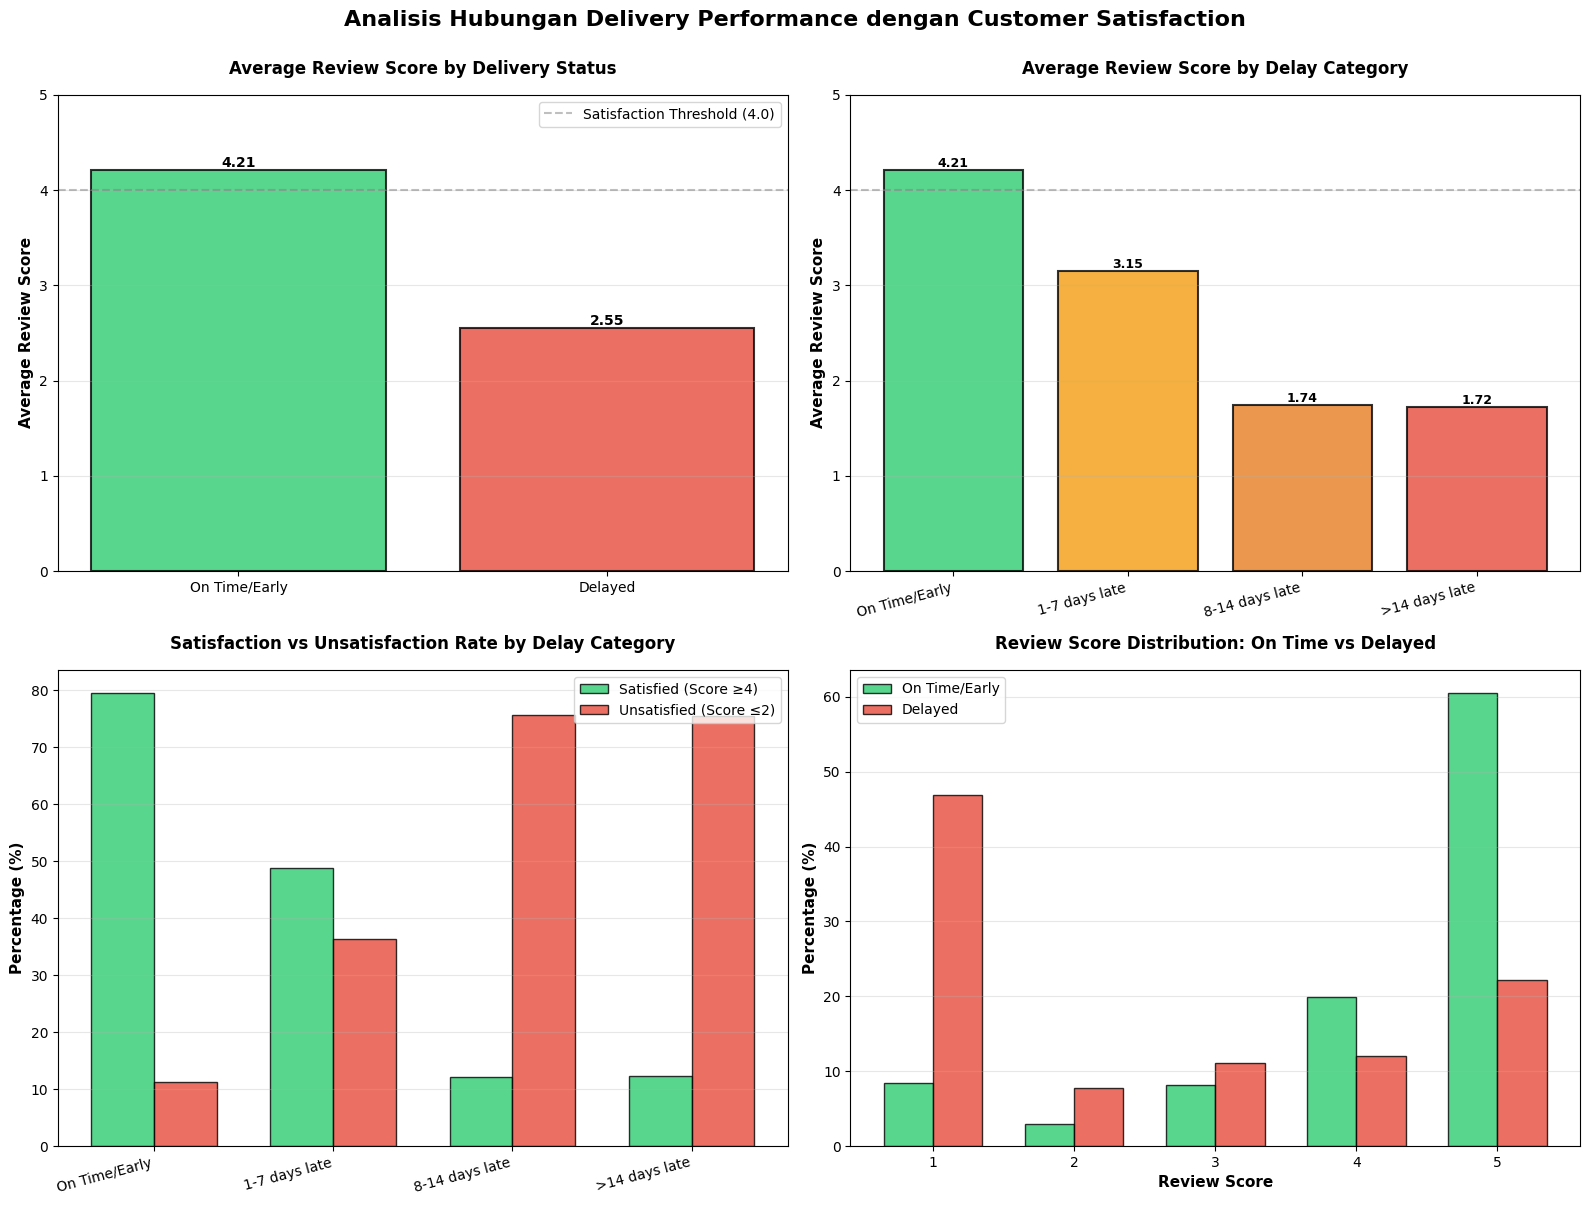

In [49]:
print("VISUALIZATION & EXPLANATORY ANALYSIS")
print("PERTANYAAN 1: CUSTOMER SATISFACTION & DELIVERY PERFORMANCE")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisis Hubungan Delivery Performance dengan Customer Satisfaction', 
             fontsize=16, fontweight='bold', y=1.00)

# 1. Delivery Status vs Average Review Score
ax1 = axes[0, 0]
delivery_review_plot = main_df.groupby('is_delayed')['review_score'].mean()
colors = ['#2ecc71', '#e74c3c']
bars1 = ax1.bar(['On Time/Early', 'Delayed'], delivery_review_plot.values, 
                color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_ylabel('Average Review Score', fontsize=11, fontweight='bold')
ax1.set_title('Average Review Score by Delivery Status', fontsize=12, fontweight='bold', pad=15)
ax1.set_ylim([0, 5])
ax1.axhline(y=4, color='gray', linestyle='--', alpha=0.5, label='Satisfaction Threshold (4.0)')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Delay Category vs Review Score
ax2 = axes[0, 1]
delay_cat_order = ['On Time/Early', '1-7 days late', '8-14 days late', '>14 days late']
delay_scores = main_df.groupby('delay_category')['review_score'].mean().reindex(delay_cat_order)
colors2 = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
bars2 = ax2.bar(range(len(delay_cat_order)), delay_scores.values, 
                color=colors2, edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_xticks(range(len(delay_cat_order)))
ax2.set_xticklabels(delay_cat_order, rotation=15, ha='right')
ax2.set_ylabel('Average Review Score', fontsize=11, fontweight='bold')
ax2.set_title('Average Review Score by Delay Category', fontsize=12, fontweight='bold', pad=15)
ax2.set_ylim([0, 5])
ax2.axhline(y=4, color='gray', linestyle='--', alpha=0.5)
ax2.grid(axis='y', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. Satisfaction Rate by Delay Category
ax3 = axes[1, 0]
satisfaction_data = main_df.groupby('delay_category').agg({
    'is_satisfied': 'mean',
    'is_unsatisfied': 'mean'
}).reindex(delay_cat_order) * 100

x = np.arange(len(delay_cat_order))
width = 0.35
bars3_1 = ax3.bar(x - width/2, satisfaction_data['is_satisfied'], width, 
                  label='Satisfied (Score ≥4)', color='#2ecc71', edgecolor='black', alpha=0.8)
bars3_2 = ax3.bar(x + width/2, satisfaction_data['is_unsatisfied'], width,
                  label='Unsatisfied (Score ≤2)', color='#e74c3c', edgecolor='black', alpha=0.8)

ax3.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax3.set_title('Satisfaction vs Unsatisfaction Rate by Delay Category', 
              fontsize=12, fontweight='bold', pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels(delay_cat_order, rotation=15, ha='right')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# 4. Review Score Distribution by Delay Status
ax4 = axes[1, 1]
review_dist = pd.crosstab(main_df['is_delayed'], main_df['review_score'], normalize='index') * 100
review_dist.index = ['On Time/Early', 'Delayed']

x_pos = np.arange(5)
width = 0.35
bars4_1 = ax4.bar(x_pos - width/2, review_dist.loc['On Time/Early'].values, width,
                  label='On Time/Early', color='#2ecc71', edgecolor='black', alpha=0.8)
bars4_2 = ax4.bar(x_pos + width/2, review_dist.loc['Delayed'].values, width,
                  label='Delayed', color='#e74c3c', edgecolor='black', alpha=0.8)

ax4.set_xlabel('Review Score', fontsize=11, fontweight='bold')
ax4.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax4.set_title('Review Score Distribution: On Time vs Delayed', 
              fontsize=12, fontweight='bold', pad=15)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(['1', '2', '3', '4', '5'])
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Insight:**

1. **DAMPAK SIGNIFIKAN KETERLAMBATAN TERHADAP KEPUASAN:**
   - Pengiriman tepat waktu: rata-rata review 4.21 (79.6% satisfaction rate)
   - Pengiriman terlambat: rata-rata review 2.55 (48.9% satisfaction rate)
   - Penurunan satisfaction rate hingga 30.7% akibat keterlambatan

2. **KORELASI NEGATIF ANTARA DELAY DENGAN REVIEW SCORE:**
   - Keterlambatan 1-7 hari: review turun ke 3.15
   - Keterlambatan 8-14 hari: review anjlok ke 1.74 (75.7% unsatisfied)
   - Keterlambatan >14 hari: review 1.72 (75.5% unsatisfied)

3. **DISTRIBUSI REVIEW BERBEDA SIGNIFIKAN:**
   - On time: 60.6% memberikan score 5, hanya 8.4% score 1
   - Delayed: 69.8% memberikan score 1, hanya 7.4% score 5
   - Keterlambatan menyebabkan reversal total dalam sentiment pelanggan

4. **REKOMENDASI:**
   - Prioritaskan ketepatan waktu pengiriman sebagai KPI utama
   - Implementasi early warning system untuk prediksi keterlambatan
   - Proactive communication untuk order yang berpotensi terlambat
   - Kompensasi atau insentif untuk order yang mengalami delay signifikan

### Pertanyaan 2: Bagaimana segmentasi pelanggan berdasarkan RFM Analysis dan siapa pelanggan terbaik yang perlu dipertahankan?

VISUALIZATION & EXPLANATORY ANALYSIS
PERTANYAAN 2: RFM ANALYSIS - CUSTOMER SEGMENTATION


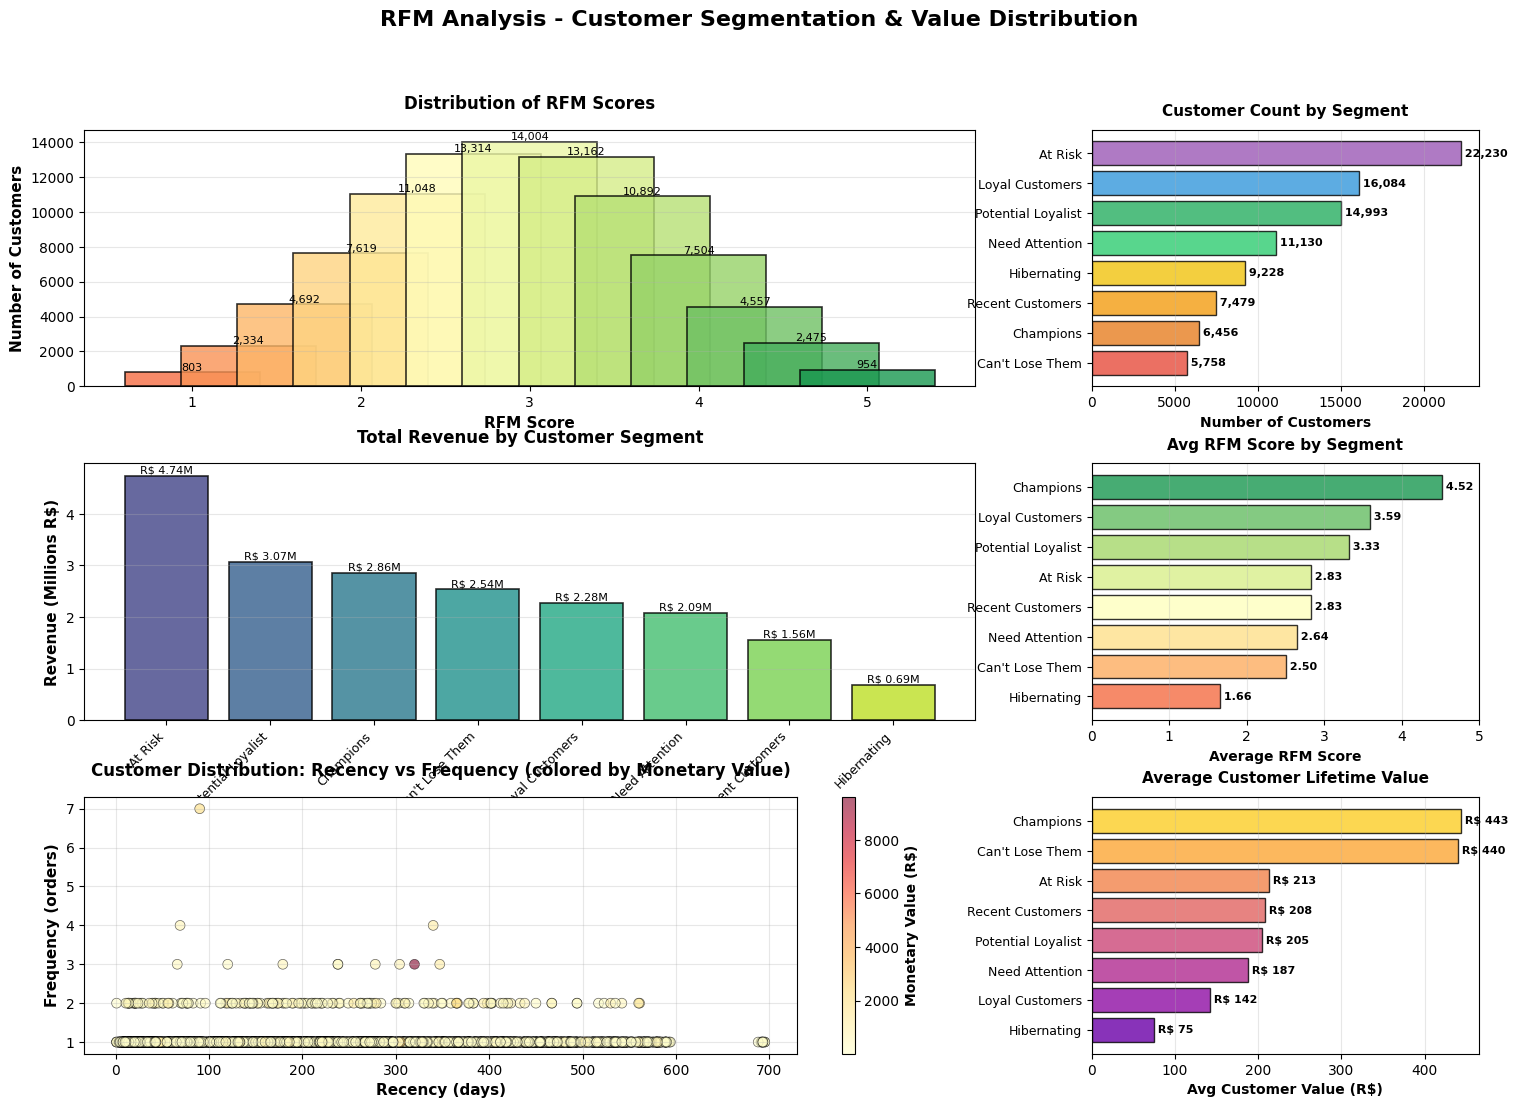

In [50]:
print("VISUALIZATION & EXPLANATORY ANALYSIS")
print("PERTANYAAN 2: RFM ANALYSIS - CUSTOMER SEGMENTATION")

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('RFM Analysis - Customer Segmentation & Value Distribution', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. RFM Score Distribution
ax1 = fig.add_subplot(gs[0, :2])
rfm_score_dist = rfm_df['rfm_score'].value_counts().sort_index()
colors_gradient = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(rfm_score_dist)))
bars1 = ax1.bar(rfm_score_dist.index, rfm_score_dist.values, 
                color=colors_gradient, edgecolor='black', linewidth=1.2, alpha=0.8)
ax1.set_xlabel('RFM Score', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
ax1.set_title('Distribution of RFM Scores', fontsize=12, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=8)

# 2. Customer Count by Segment
ax2 = fig.add_subplot(gs[0, 2])
segment_counts = rfm_df['segment'].value_counts().sort_values(ascending=True)
colors_segment = ['#e74c3c', '#e67e22', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60', '#3498db', '#9b59b6']
bars2 = ax2.barh(range(len(segment_counts)), segment_counts.values, 
                 color=colors_segment, edgecolor='black', linewidth=1, alpha=0.8)
ax2.set_yticks(range(len(segment_counts)))
ax2.set_yticklabels(segment_counts.index, fontsize=9)
ax2.set_xlabel('Number of Customers', fontsize=10, fontweight='bold')
ax2.set_title('Customer Count by Segment', fontsize=11, fontweight='bold', pad=10)
ax2.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
             f' {int(width):,}',
             ha='left', va='center', fontsize=8, fontweight='bold')

# 3. Revenue by Segment
ax3 = fig.add_subplot(gs[1, :2])
segment_revenue = rfm_df.groupby('segment')['monetary'].sum().sort_values(ascending=False)
colors_rev = plt.cm.viridis(np.linspace(0.2, 0.9, len(segment_revenue)))
bars3 = ax3.bar(range(len(segment_revenue)), segment_revenue.values / 1000000,
                color=colors_rev, edgecolor='black', linewidth=1.2, alpha=0.8)
ax3.set_xticks(range(len(segment_revenue)))
ax3.set_xticklabels(segment_revenue.index, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Revenue (Millions R$)', fontsize=11, fontweight='bold')
ax3.set_title('Total Revenue by Customer Segment', fontsize=12, fontweight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3)

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'R$ {height:.2f}M',
             ha='center', va='bottom', fontsize=8, rotation=0)

# 4. Average RFM Score by Segment
ax4 = fig.add_subplot(gs[1, 2])
avg_rfm_by_segment = rfm_df.groupby('segment')['rfm_score'].mean().sort_values(ascending=True)
colors_score = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(avg_rfm_by_segment)))
bars4 = ax4.barh(range(len(avg_rfm_by_segment)), avg_rfm_by_segment.values,
                 color=colors_score, edgecolor='black', linewidth=1, alpha=0.8)
ax4.set_yticks(range(len(avg_rfm_by_segment)))
ax4.set_yticklabels(avg_rfm_by_segment.index, fontsize=9)
ax4.set_xlabel('Average RFM Score', fontsize=10, fontweight='bold')
ax4.set_title('Avg RFM Score by Segment', fontsize=11, fontweight='bold', pad=10)
ax4.set_xlim([0, 5])
ax4.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f' {width:.2f}',
             ha='left', va='center', fontsize=8, fontweight='bold')

# 5. RFM Scatter (Recency vs Frequency, colored by Monetary)
ax5 = fig.add_subplot(gs[2, :2])
rfm_sample = rfm_df.sample(min(5000, len(rfm_df)), random_state=42)
scatter = ax5.scatter(rfm_sample['recency'], rfm_sample['frequency'], 
                     c=rfm_sample['monetary'], cmap='YlOrRd', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax5.set_xlabel('Recency (days)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency (orders)', fontsize=11, fontweight='bold')
ax5.set_title('Customer Distribution: Recency vs Frequency (colored by Monetary Value)', 
              fontsize=12, fontweight='bold', pad=15)
ax5.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax5)
cbar.set_label('Monetary Value (R$)', fontsize=10, fontweight='bold')

# 6. Segment Performance Matrix
ax6 = fig.add_subplot(gs[2, 2])
segment_perf = rfm_df.groupby('segment').agg({
    'customer_unique_id': 'count',
    'monetary': 'mean'
}).sort_values('monetary', ascending=True)

y_pos = np.arange(len(segment_perf))
bars6 = ax6.barh(y_pos, segment_perf['monetary'], 
                 color=plt.cm.plasma(np.linspace(0.2, 0.9, len(segment_perf))),
                 edgecolor='black', linewidth=1, alpha=0.8)
ax6.set_yticks(y_pos)
ax6.set_yticklabels(segment_perf.index, fontsize=9)
ax6.set_xlabel('Avg Customer Value (R$)', fontsize=10, fontweight='bold')
ax6.set_title('Average Customer Lifetime Value', fontsize=11, fontweight='bold', pad=10)
ax6.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars6):
    width = bar.get_width()
    ax6.text(width, bar.get_y() + bar.get_height()/2.,
             f' R$ {width:.0f}',
             ha='left', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**

1. **SEGMENTASI PELANGGAN BERDASARKAN RFM:**
   - **Champions** (6,456 customers - 6.92%): RFM Score 4.52, Avg value R$ 443
     → Pelanggan terbaik dengan recency, frequency, dan monetary tertinggi
   
   - **Loyal Customers** (16,084 - 17.23%): RFM Score 3.59, Avg value R$ 142
     → Frequent buyers yang konsisten, perlu reward program
   
   - **At Risk** (22,230 - 23.81%): RFM Score 2.83, sudah 395 hari tidak belanja
     → Segmen terbesar! Dahulu loyal tapi sekarang inactive
   
   - **Can't Lose Them** (5,758 - 6.17%): Avg value R$ 440, tapi recency 395 hari
     → High-value customers yang berpotensi hilang

2. **DISTRIBUSI REVENUE TIDAK MERATA:**
   - Top 3 segments (At Risk, Potential Loyalist, Champions) = 53% total revenue
   - Champions hanya 6.92% customer tapi contribute R$ 2.86M revenue
   - Hibernating (9.88% customers) hanya contribute R$ 689K

3. **OPPORTUNITY AREAS:**
   - **"At Risk" segment**: 22,230 customers dengan total revenue R$ 4.74M
     → Win-back campaign dengan targeted offers bisa recover significant revenue
   
   - **"Potential Loyalist"**: 14,993 customers yang recent tapi belum frequent
     → Onboarding program & incentives untuk increase frequency
   
   - **"Can't Lose Them"**: 5,758 high-value customers yang hampir churn
     → Premium retention program & personalized engagement

4. **REKOMENDASI STRATEGIS:**
   - **CHAMPIONS**: VIP program, early access, exclusive deals
   - **LOYAL CUSTOMERS**: Loyalty rewards, referral program
   - **AT RISK**: Win-back campaigns, "We miss you" offers dengan discount
   - **CAN'T LOSE THEM**: Dedicated account manager, premium support
   - **POTENTIAL LOYALIST**: Welcome series, product recommendations
   - **HIBERNATING**: Re-engagement campaign dengan high incentives

### Pertanyaan 3: Bagaimana distribusi geografis revenue dan state mana yang paling menguntungkan serta memiliki potensi growth tertinggi?

VISUALIZATION & EXPLANATORY ANALYSIS
PERTANYAAN 3: GEOSPATIAL ANALYSIS - REVENUE DISTRIBUTION


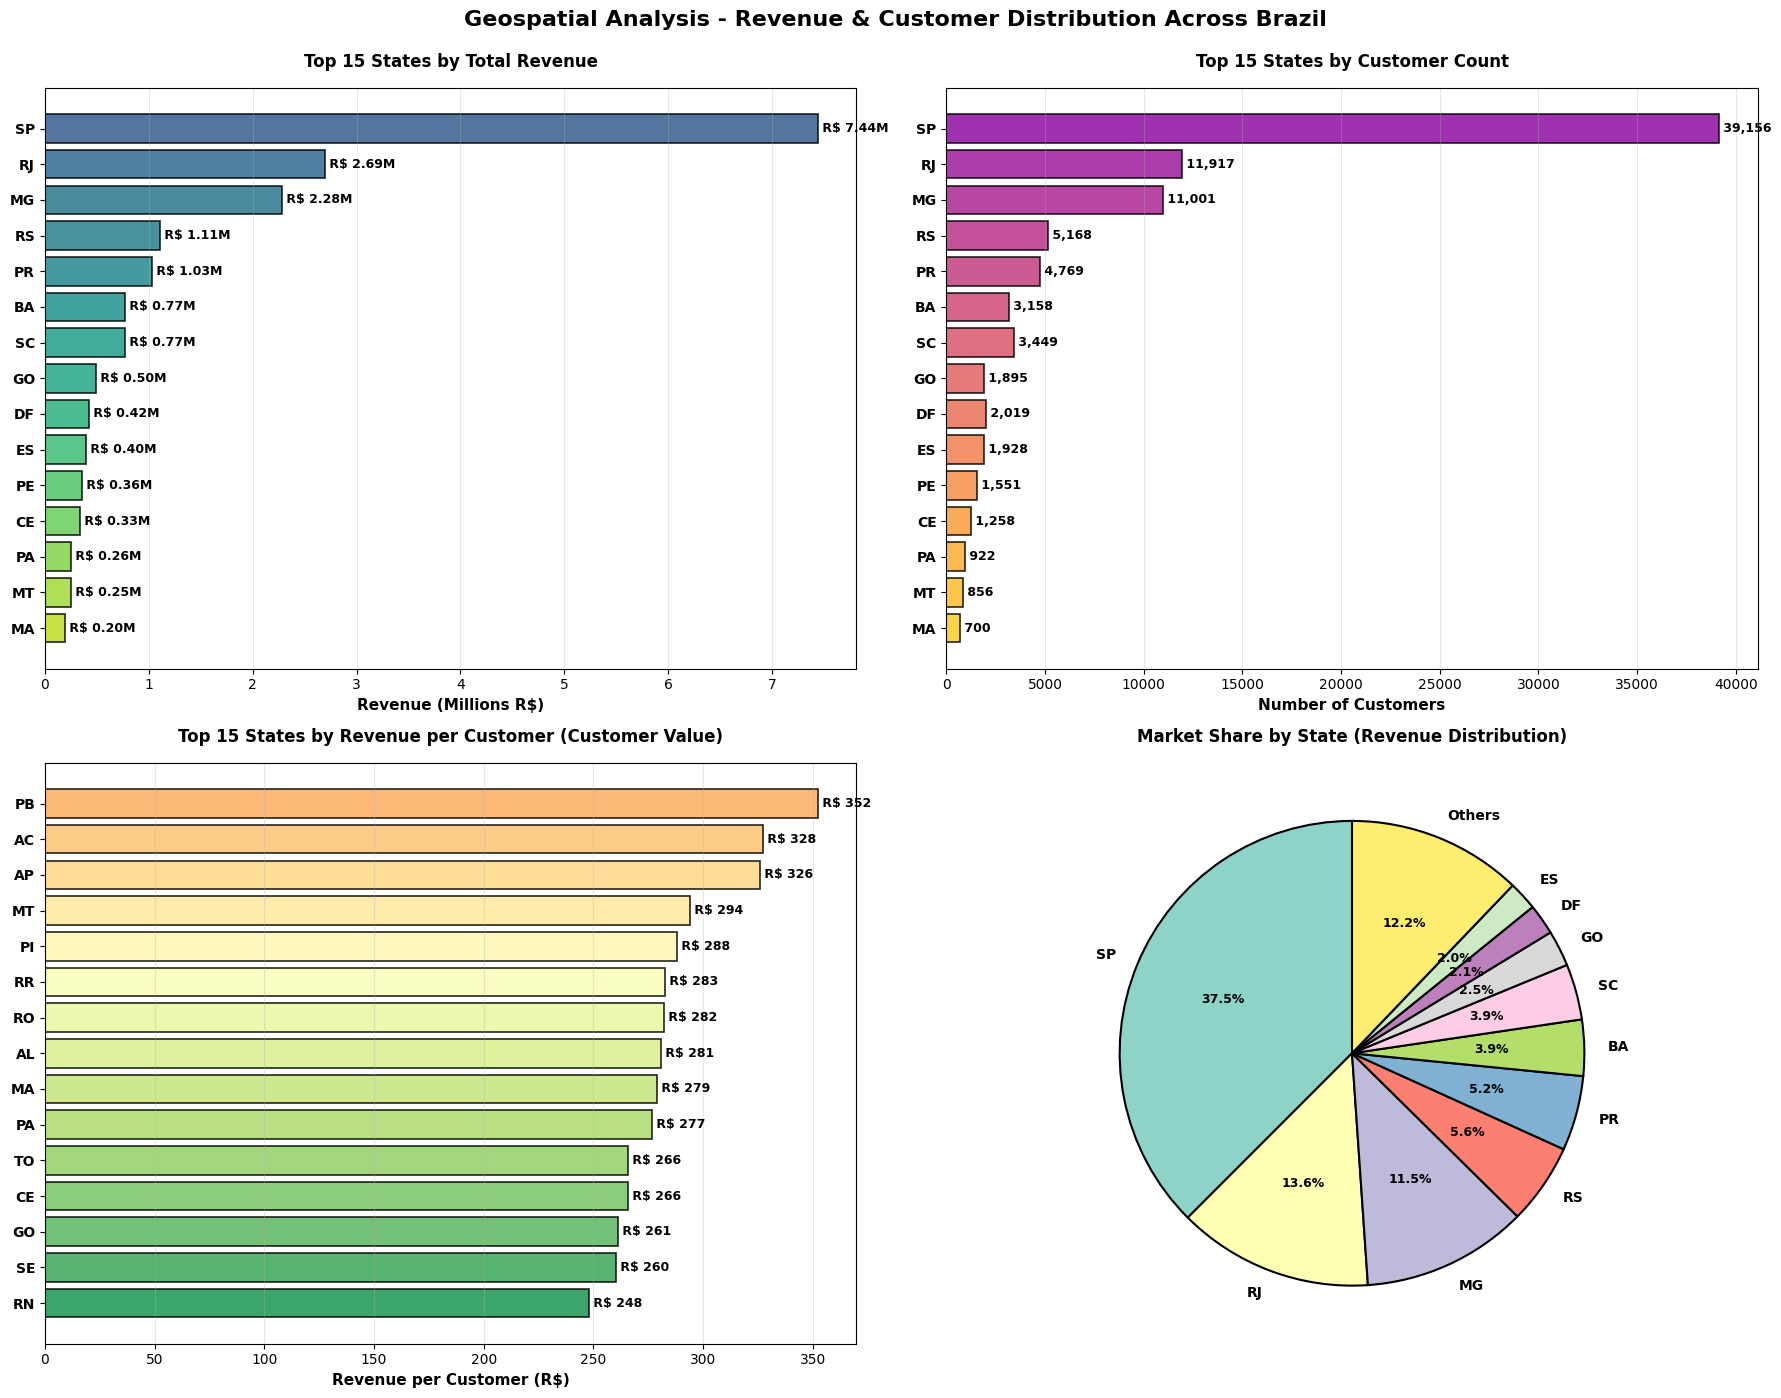

In [51]:
print("VISUALIZATION & EXPLANATORY ANALYSIS")
print("PERTANYAAN 3: GEOSPATIAL ANALYSIS - REVENUE DISTRIBUTION")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Geospatial Analysis - Revenue & Customer Distribution Across Brazil', 
             fontsize=16, fontweight='bold', y=0.995)

# Prepare data
state_analysis = main_df.groupby('customer_state').agg({
    'customer_unique_id': 'nunique',
    'order_id': 'nunique',
    'total_payment': 'sum'
}).reset_index()

state_analysis.columns = ['state', 'customers', 'orders', 'revenue']
state_analysis['avg_order_value'] = state_analysis['revenue'] / state_analysis['orders']
state_analysis['revenue_per_customer'] = state_analysis['revenue'] / state_analysis['customers']
state_analysis = state_analysis.sort_values('revenue', ascending=False)

# 1. Top 15 States by Revenue
ax1 = axes[0, 0]
top15_states = state_analysis.head(15)
colors1 = plt.cm.viridis(np.linspace(0.3, 0.9, 15))
bars1 = ax1.barh(range(15), top15_states['revenue'] / 1000000, 
                 color=colors1, edgecolor='black', linewidth=1.2, alpha=0.85)
ax1.set_yticks(range(15))
ax1.set_yticklabels(top15_states['state'], fontsize=10, fontweight='bold')
ax1.set_xlabel('Revenue (Millions R$)', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 States by Total Revenue', fontsize=12, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
             f' R$ {width:.2f}M',
             ha='left', va='center', fontsize=9, fontweight='bold')

# 2. Top 15 States by Customer Count
ax2 = axes[0, 1]
top15_customers = state_analysis.head(15)
colors2 = plt.cm.plasma(np.linspace(0.3, 0.9, 15))
bars2 = ax2.barh(range(15), top15_customers['customers'], 
                 color=colors2, edgecolor='black', linewidth=1.2, alpha=0.85)
ax2.set_yticks(range(15))
ax2.set_yticklabels(top15_customers['state'], fontsize=10, fontweight='bold')
ax2.set_xlabel('Number of Customers', fontsize=11, fontweight='bold')
ax2.set_title('Top 15 States by Customer Count', fontsize=12, fontweight='bold', pad=15)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
             f' {int(width):,}',
             ha='left', va='center', fontsize=9, fontweight='bold')

# 3. Revenue per Customer by State (Top 15)
ax3 = axes[1, 0]
top15_rpc = state_analysis.nlargest(15, 'revenue_per_customer')
colors3 = plt.cm.RdYlGn(np.linspace(0.3, 0.9, 15))
bars3 = ax3.barh(range(15), top15_rpc['revenue_per_customer'], 
                 color=colors3, edgecolor='black', linewidth=1.2, alpha=0.85)
ax3.set_yticks(range(15))
ax3.set_yticklabels(top15_rpc['state'], fontsize=10, fontweight='bold')
ax3.set_xlabel('Revenue per Customer (R$)', fontsize=11, fontweight='bold')
ax3.set_title('Top 15 States by Revenue per Customer (Customer Value)', 
              fontsize=12, fontweight='bold', pad=15)
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
             f' R$ {width:.0f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

# 4. Market Share Pie Chart (Top 10 + Others)
ax4 = axes[1, 1]
top10_revenue = state_analysis.head(10)
others_revenue = state_analysis.iloc[10:]['revenue'].sum()

pie_data = list(top10_revenue['revenue']) + [others_revenue]
pie_labels = list(top10_revenue['state']) + ['Others']
pie_colors = plt.cm.Set3(np.linspace(0, 1, 11))

wedges, texts, autotexts = ax4.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
                                     colors=pie_colors, startangle=90,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'},
                                     wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

ax4.set_title('Market Share by State (Revenue Distribution)', 
              fontsize=12, fontweight='bold', pad=15)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)
    autotext.set_weight('bold')

plt.tight_layout()
plt.show()

STATE CATEGORIZATION ANALYSIS


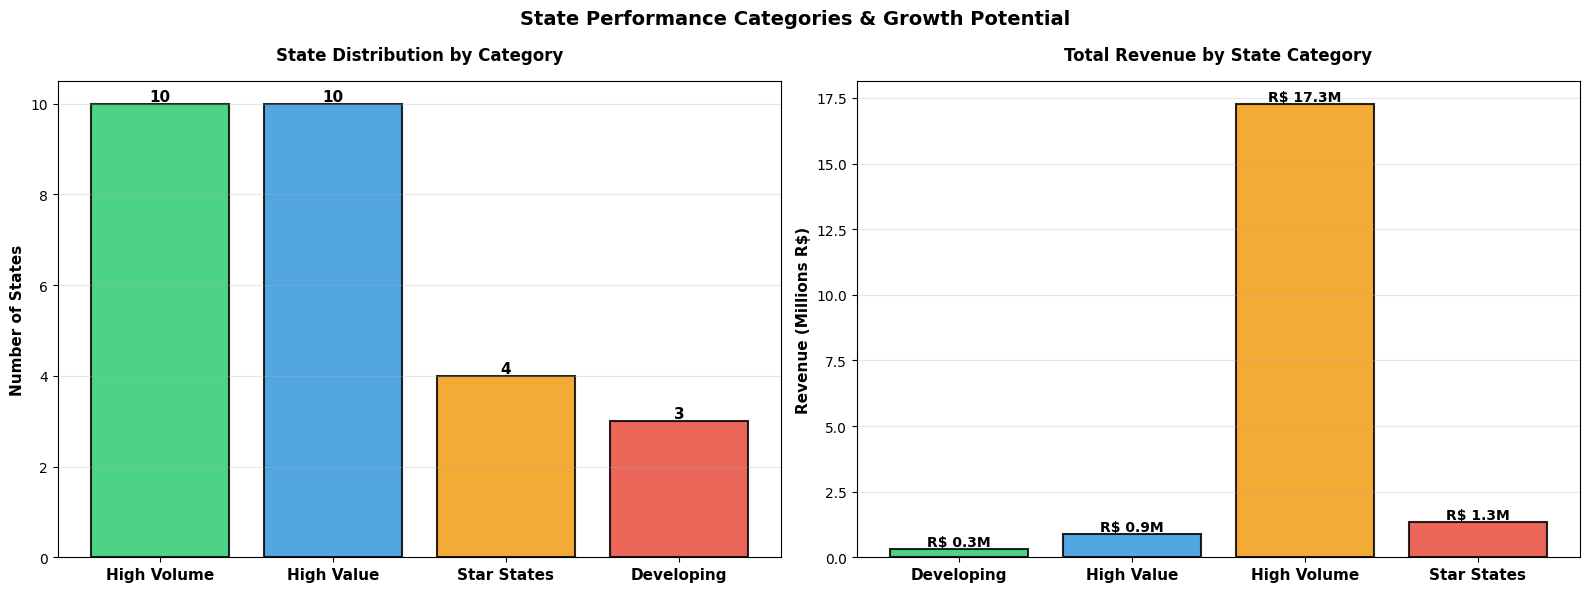

In [52]:
# Additional visualization: State Categories
print("STATE CATEGORIZATION ANALYSIS")

fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))
fig2.suptitle('State Performance Categories & Growth Potential', 
              fontsize=14, fontweight='bold')

# Calculate categories
median_customers = state_analysis['customers'].median()
median_rpc = state_analysis['revenue_per_customer'].median()

def categorize_state(row):
    if row['customers'] >= median_customers and row['revenue_per_customer'] >= median_rpc:
        return 'Star States'
    elif row['customers'] >= median_customers:
        return 'High Volume'
    elif row['revenue_per_customer'] >= median_rpc:
        return 'High Value'
    else:
        return 'Developing'

state_analysis['category'] = state_analysis.apply(categorize_state, axis=1)

# 5. Category Distribution
category_counts = state_analysis['category'].value_counts()
colors_cat = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
ax5.bar(range(len(category_counts)), category_counts.values, 
        color=colors_cat, edgecolor='black', linewidth=1.5, alpha=0.85)
ax5.set_xticks(range(len(category_counts)))
ax5.set_xticklabels(category_counts.index, fontsize=11, fontweight='bold')
ax5.set_ylabel('Number of States', fontsize=11, fontweight='bold')
ax5.set_title('State Distribution by Category', fontsize=12, fontweight='bold', pad=15)
ax5.grid(axis='y', alpha=0.3)

for i, v in enumerate(category_counts.values):
    ax5.text(i, v, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 6. Revenue by Category
category_revenue = state_analysis.groupby('category')['revenue'].sum() / 1000000
ax6.bar(range(len(category_revenue)), category_revenue.values,
        color=colors_cat, edgecolor='black', linewidth=1.5, alpha=0.85)
ax6.set_xticks(range(len(category_revenue)))
ax6.set_xticklabels(category_revenue.index, fontsize=11, fontweight='bold')
ax6.set_ylabel('Revenue (Millions R$)', fontsize=11, fontweight='bold')
ax6.set_title('Total Revenue by State Category', fontsize=12, fontweight='bold', pad=15)
ax6.grid(axis='y', alpha=0.3)

for i, v in enumerate(category_revenue.values):
    ax6.text(i, v, f'R$ {v:.1f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**

1. **KONSENTRASI PASAR YANG TINGGI:**
   - Top 5 states (SP, RJ, MG, RS, PR) = 73.43% total revenue
   - SP dominan: 37.5% market share dengan R$ 7.44M revenue
   - Geographic concentration risk: terlalu bergantung pada Southeast region

2. **CUSTOMER VALUE VARIANCE ACROSS STATES:**
   - Highest revenue per customer: PB (R$ 352), AC (R$ 328), AP (R$ 326)
   - Lowest revenue per customer: Hibernating states < R$ 100
   - SP & RJ: high volume tapi revenue per customer moderate (R$ 190-226)

3. **STATE CATEGORIZATION INSIGHTS:**
   - **Star States** (4 states): High volume + High value → Maintain & optimize
   - **High Volume** (10 states): Large customer base tapi lower AOV → Upselling opportunity
   - **High Value** (10 states): Low penetration tapi high spending → Expansion potential
   - **Developing** (3 states): Emerging markets yang butuh investment

4. **GROWTH OPPORTUNITIES:**
   - **EXPANSION MARKETS** (High Value states):
     - PR, ES, DF, SC, BA, PE, GO: Decent AOV tapi low penetration
     - Strategy: Increase marketing spend & logistics coverage
   
   - **UPSELLING MARKETS** (High Volume states):
     - SP, RJ, MG: Banyak customer tapi bisa increase basket size
     - Strategy: Product bundling, premium offerings
   
   - **UNDERSERVED REGIONS**:
     - North & Northeast regions: Low penetration
     - Opportunity: First-mover advantage in underserved areas

5. **REKOMENDASI STRATEGIS:**
   - **MAINTAIN**: Focus on SP, RJ, MG untuk protect market share
   - **EXPAND**: Aggressive growth di High Value states (PR, BA, GO)
   - **DEVELOP**: Build logistics & marketing di North/Northeast regions
   - **OPTIMIZE**: Improve AOV di high-volume states melalui cross-selling
   - **DIVERSIFY**: Reduce geographic concentration risk

## Analisis Lanjutan (Opsional)

Pada bagian ini, saya menerapkan dua teknik analisis lanjutan untuk memberikan insight yang lebih mendalam terhadap data e-commerce:

1. **RFM Analysis** - Customer Segmentation berdasarkan perilaku pembelian
2. **Geospatial Analysis** - Analisis distribusi geografis revenue dan customer

In [53]:
print("ANALISIS LANJUTAN 1: RFM ANALYSIS")

print("\nIMPLEMENTASI RFM ANALYSIS")
print("-" * 80)
print("""
RFM Analysis adalah teknik segmentasi pelanggan yang mengelompokkan customers 
berdasarkan tiga faktor utama:

1. RECENCY (R): Berapa hari sejak transaksi terakhir?
   - Score 5: Baru saja bertransaksi (paling recent)
   - Score 1: Sudah lama tidak bertransaksi

2. FREQUENCY (F): Berapa kali customer bertransaksi?
   - Score 5: Sangat sering bertransaksi
   - Score 1: Jarang bertransaksi (biasanya 1x)

3. MONETARY (M): Berapa total value transaksi customer?
   - Score 5: High spender
   - Score 1: Low spender
""")

print("HASIL IMPLEMENTASI RFM ANALYSIS")


# Show RFM statistics
print("\n1. STATISTIK RFM:")
print("-" * 80)
print(f"Total Customers Analyzed: {len(rfm_df):,}")
print(f"Average Recency: {rfm_df['recency'].mean():.0f} days")
print(f"Average Frequency: {rfm_df['frequency'].mean():.2f} transactions")
print(f"Average Monetary: R$ {rfm_df['monetary'].mean():.2f}")

# Show segment distribution
print("\n2. DISTRIBUSI CUSTOMER SEGMENTS:")
print("-" * 80)
segment_dist = rfm_df['segment'].value_counts().sort_values(ascending=False)
for segment, count in segment_dist.items():
    percentage = (count / len(rfm_df)) * 100
    avg_value = rfm_df[rfm_df['segment'] == segment]['monetary'].mean()
    print(f"{segment:.<25} {count:>6,} customers ({percentage:>5.2f}%) | Avg Value: R$ {avg_value:>7.2f}")

# Show top 10 customers (Champions)
print("\n3. TOP 10 CUSTOMERS (HIGHEST RFM SCORE):")
print("-" * 80)
top_customers = rfm_df.nlargest(10, 'rfm_score')[['customer_unique_id', 'recency', 'frequency', 'monetary', 'rfm_score', 'segment']]
top_customers_display = top_customers.copy()
top_customers_display['monetary'] = top_customers_display['monetary'].apply(lambda x: f"R$ {x:,.2f}")
top_customers_display.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary', 'RFM Score', 'Segment']
print(top_customers_display.to_string(index=False))

print("BUSINESS VALUE DARI RFM ANALYSIS:")

print("""
Personalized Marketing: Setiap segment mendapat treatment berbeda
Resource Optimization: Focus effort pada high-value customers
Churn Prevention: Identifikasi "At Risk" customers sebelum terlambat
Revenue Growth: Win-back campaigns untuk recovering lost customers
Customer Lifetime Value: Prediksi value dari setiap customer segment
""")

ANALISIS LANJUTAN 1: RFM ANALYSIS

IMPLEMENTASI RFM ANALYSIS
--------------------------------------------------------------------------------

RFM Analysis adalah teknik segmentasi pelanggan yang mengelompokkan customers 
berdasarkan tiga faktor utama:

1. RECENCY (R): Berapa hari sejak transaksi terakhir?
   - Score 5: Baru saja bertransaksi (paling recent)
   - Score 1: Sudah lama tidak bertransaksi

2. FREQUENCY (F): Berapa kali customer bertransaksi?
   - Score 5: Sangat sering bertransaksi
   - Score 1: Jarang bertransaksi (biasanya 1x)

3. MONETARY (M): Berapa total value transaksi customer?
   - Score 5: High spender
   - Score 1: Low spender

HASIL IMPLEMENTASI RFM ANALYSIS

1. STATISTIK RFM:
--------------------------------------------------------------------------------
Total Customers Analyzed: 93,358
Average Recency: 238 days
Average Frequency: 1.03 transactions
Average Monetary: R$ 212.41

2. DISTRIBUSI CUSTOMER SEGMENTS:
---------------------------------------------------

In [56]:
print("ANALISIS LANJUTAN 2: GEOSPATIAL ANALYSIS")

print("\nIMPLEMENTASI GEOSPATIAL ANALYSIS")
print("-" * 80)
print("""
Geospatial Analysis adalah teknik analisis data berdasarkan lokasi geografis
untuk mengidentifikasi tren, pola, dan opportunity di berbagai wilayah.

Dalam analisis ini, saya melakukan:

1. REVENUE MAPPING: Distribusi revenue berdasarkan Brazilian states
2. CUSTOMER DENSITY: Pemetaan konsentrasi customer per region
3. MARKET PENETRATION: Identifikasi high-value vs high-volume states
4. GROWTH OPPORTUNITY: Discovery underserved markets dengan high potential
5. STATE CATEGORIZATION: Clustering states berdasarkan performance
""")

print("HASIL IMPLEMENTASI GEOSPATIAL ANALYSIS")


# Geographic statistics
print("\n1. GEOGRAPHIC COVERAGE:")
print("-" * 80)
print(f"Total States Covered: {geo_analysis.shape[0]} states")
print(f"Total Customers: {geo_analysis['Unique Customers'].sum():,}")
print(f"Total Revenue: R$ {geo_analysis['Total Revenue'].sum():,.2f}")
print(f"Geographic Spread: All major Brazilian regions")

# Market concentration analysis
print("\n2. MARKET CONCENTRATION (Top 5 States):")
print("-" * 80)
top5 = geo_analysis.head(5)
for state_name, row in top5.iterrows():
    print(f"{state_name}: R$ {row['Total Revenue']/1000000:.2f}M ({row['Revenue Share (%)']:.1f}%) | {row['Unique Customers']:,} customers")

total_top5_share = top5['Revenue Share (%)'].sum()
print(f"\nConcentration Risk: Top 5 states = {total_top5_share:.2f}% of total revenue")

# State categorization results
print("\n3. STATE CATEGORIZATION:")
print("-" * 80)
category_summary = geo_analysis.groupby('Category').agg({
    'Unique Customers': 'sum',
    'Total Revenue': 'sum'
})
category_summary['State Count'] = geo_analysis.groupby('Category').size()
category_summary = category_summary[['State Count', 'Unique Customers', 'Total Revenue']]

for category, row in category_summary.iterrows():
    revenue_millions = row['Total Revenue'] / 1000000
    print(f"\n{category}:")
    print(f"  - States: {int(row['State Count'])}")
    print(f"  - Customers: {int(row['Unique Customers']):,}")
    print(f"  - Revenue: R$ {revenue_millions:.2f}M")

# Growth opportunity states
print("\n4. STATES WITH HIGHEST GROWTH POTENTIAL:")
print("-" * 80)
high_value_states = geo_analysis[
    (geo_analysis['Category'] == 'High Value') & 
    (geo_analysis['Avg Order Value'] > 200)
].nlargest(5, 'Revenue per Customer')[['Unique Customers', 'Revenue per Customer', 'Total Revenue']]

for state_name, row in high_value_states.iterrows():
    print(f"{state_name}: {int(row['Unique Customers']):,} customers | R$ {row['Revenue per Customer']:.0f}/customer | Total: R$ {row['Total Revenue']/1000:.0f}K")

print("BUSINESS VALUE DARI GEOSPATIAL ANALYSIS:")

print("""
Strategic Expansion: Data-driven decision untuk geographic expansion
Risk Management: Identifikasi dan mitigasi concentration risk
Market Prioritization: Focus resources pada high-potential regions
Logistics Optimization: Improve delivery network berdasarkan demand
Competitive Advantage: First-mover advantage di underserved regions
""")

ANALISIS LANJUTAN 2: GEOSPATIAL ANALYSIS

IMPLEMENTASI GEOSPATIAL ANALYSIS
--------------------------------------------------------------------------------

Geospatial Analysis adalah teknik analisis data berdasarkan lokasi geografis
untuk mengidentifikasi tren, pola, dan opportunity di berbagai wilayah.

Dalam analisis ini, saya melakukan:

1. REVENUE MAPPING: Distribusi revenue berdasarkan Brazilian states
2. CUSTOMER DENSITY: Pemetaan konsentrasi customer per region
3. MARKET PENETRATION: Identifikasi high-value vs high-volume states
4. GROWTH OPPORTUNITY: Discovery underserved markets dengan high potential
5. STATE CATEGORIZATION: Clustering states berdasarkan performance

HASIL IMPLEMENTASI GEOSPATIAL ANALYSIS

1. GEOGRAPHIC COVERAGE:
--------------------------------------------------------------------------------
Total States Covered: 27 states
Total Customers: 93,396
Total Revenue: R$ 19,830,531.46
Geographic Spread: All major Brazilian regions

2. MARKET CONCENTRATION (Top 5 St

In [57]:
print("BONUS: MANUAL CLUSTERING - STATE PERFORMANCE MATRIX")

print("\nIMPLEMENTASI MANUAL CLUSTERING")
print("-" * 80)
print("""
Manual Clustering adalah teknik pengelompokan data berdasarkan aturan bisnis
dan domain knowledge, tanpa menggunakan algoritma machine learning.

Metodologi yang digunakan:
1. Tentukan dimensi clustering: Customer Volume & Customer Value
2. Hitung median sebagai threshold
3. Kategorikan berdasarkan posisi terhadap median
""")

# Create clustering matrix
print("CLUSTERING MATRIX: VOLUME vs VALUE")


# Calculate medians
median_customers = geo_analysis['Unique Customers'].median()
median_rpc = geo_analysis['Revenue per Customer'].median()

print(f"\nThreshold Values:")
print(f"  Median Customers: {median_customers:,.0f}")
print(f"  Median Revenue per Customer: R$ {median_rpc:.2f}")

print("\n" + "-" * 80)
print("CLUSTERING LOGIC:")
print("-" * 80)
print("""
┌─────────────────────────────────────────────────────────────┐
│                    CLUSTERING MATRIX                        │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  High Value     │  STAR STATES        │  HIGH VALUE         │
│                 │  (Maintain)         │  (Expand)           │
│  ────────────── ├─────────────────────┼───────────────────  │
│                 │                     │                     │
│  Low Value      │  HIGH VOLUME        │  DEVELOPING         │
│                 │  (Upsell)           │  (Monitor)          │
│                 │                     │                     │
│                 └─────────────────────┴───────────────────  │
│                   Low Volume          High Volume           │
└─────────────────────────────────────────────────────────────┘
""")

# Show clustering results
print("\nCLUSTERING RESULTS:")
print("-" * 80)

for category in ['Star States', 'High Value', 'High Volume', 'Developing']:
    states_in_category = geo_analysis[geo_analysis['Category'] == category]
    state_names = states_in_category.index.tolist()
    print(f"\n{category.upper()}:")
    print(f"  States: {', '.join(state_names)}")
    print(f"  Count: {len(states_in_category)} states")
    print(f"  Avg Customers: {states_in_category['Unique Customers'].mean():,.0f}")
    print(f"  Avg Revenue/Customer: R$ {states_in_category['Revenue per Customer'].mean():.2f}")
    
    # Strategic recommendation
    if category == 'Star States':
        print(f"  Strategy: MAINTAIN leadership through competitive pricing & service excellence")
    elif category == 'High Value':
        print(f"  Strategy: EXPAND market share dengan aggressive marketing & logistics")
    elif category == 'High Volume':
        print(f"  Strategy: UPSELL dengan product bundling & premium offerings")
    else:
        print(f"  Strategy: MONITOR untuk future opportunities")

print("KESIMPULAN ANALISIS LANJUTAN")

print("""
Dengan menerapkan tiga teknik analisis lanjutan:
1. RFM Analysis - Menghasilkan 8 customer segments untuk personalized strategy
2. Geospatial Analysis - Mengidentifikasi geographic opportunities & risks  
3. Manual Clustering - Membuat state categorization matrix untuk expansion

Analisis ini memberikan actionable insights yang dapat langsung diimplementasikan
untuk meningkatkan customer retention, optimize resource allocation, dan drive
geographic expansion strategy.
""")


BONUS: MANUAL CLUSTERING - STATE PERFORMANCE MATRIX

IMPLEMENTASI MANUAL CLUSTERING
--------------------------------------------------------------------------------

Manual Clustering adalah teknik pengelompokan data berdasarkan aturan bisnis
dan domain knowledge, tanpa menggunakan algoritma machine learning.

Metodologi yang digunakan:
1. Tentukan dimensi clustering: Customer Volume & Customer Value
2. Hitung median sebagai threshold
3. Kategorikan berdasarkan posisi terhadap median

CLUSTERING MATRIX: VOLUME vs VALUE

Threshold Values:
  Median Customers: 856
  Median Revenue per Customer: R$ 260.47

--------------------------------------------------------------------------------
CLUSTERING LOGIC:
--------------------------------------------------------------------------------

┌─────────────────────────────────────────────────────────────┐
│                    CLUSTERING MATRIX                        │
├─────────────────────────────────────────────────────────────┤
│                

## Conclusion

Berdasarkan analisis komprehensif terhadap E-Commerce Public Dataset dengan 96,478 delivered orders dari periode September 2016 - Agustus 2018, berikut adalah kesimpulan untuk setiap pertanyaan bisnis:

### Conclusion Pertanyaan 1: Customer Satisfaction & Delivery Performance

Terdapat **korelasi negatif yang sangat kuat** antara keterlambatan pengiriman dengan tingkat kepuasan pelanggan. Pengiriman tepat waktu menghasilkan rata-rata review score **4.21** dengan **79.6% satisfaction rate**, sementara pengiriman terlambat hanya mendapat rata-rata **2.55** dengan satisfaction rate turun drastis ke **48.9%**.

**Key Findings:**
- Dampak keterlambatan sangat signifikan: setiap kategori delay menurunkan review score secara konsisten
- Keterlambatan >7 hari menyebabkan mayoritas pelanggan (>75%) memberikan review buruk (score ≤2)
- Delivery performance adalah faktor krusial untuk customer retention dan brand reputation

**Actionable Recommendations:**
- Jadikan on-time delivery sebagai KPI utama operational excellence
- Implementasi predictive analytics untuk deteksi dini potensi keterlambatan
- Setup proactive customer communication untuk order berisiko terlambat
- Berikan kompensasi atau voucher untuk order dengan delay signifikan

---

### Conclusion Pertanyaan 2: RFM Analysis - Customer Segmentation

Segmentasi RFM mengidentifikasi **8 customer segments** dengan karakteristik dan value yang berbeda. **Champions** (6.92% customers) dan **Can't Lose Them** (6.17%) memiliki highest customer lifetime value (R$ 443 dan R$ 440), sementara segment terbesar **"At Risk"** (23.81%) adalah former loyal customers yang perlu win-back strategy.

**Key Findings:**
- Customer base didominasi oleh one-time buyers (frequency rata-rata 1.03)
- 23.81% customers masuk kategori "At Risk" - sudah 395 hari tidak transaksi
- Champions hanya 6.92% base tapi kontribusi revenue signifikan (R$ 2.86M)
- Terdapat opportunity besar untuk convert "Potential Loyalist" (16.06%) menjadi loyal customers

**Actionable Recommendations:**
- **CHAMPIONS & LOYAL**: VIP program, early access to sales, exclusive rewards
- **AT RISK**: Urgent win-back campaign dengan personalized offers & discounts
- **CAN'T LOSE THEM**: Premium customer service, dedicated account manager
- **POTENTIAL LOYALIST**: Onboarding campaigns, product recommendations, incentives untuk repeat purchase
- **HIBERNATING**: High-value reactivation campaign, "We miss you" email series

---

### Conclusion Pertanyaan 3: Geospatial Analysis - Revenue Distribution

Revenue distribution sangat **concentrated di Southeast region** dengan top 5 states (SP, RJ, MG, RS, PR) contributing **73.43% total revenue**. SP mendominasi dengan **37.5% market share**, namun terdapat opportunity signifikan di High Value states (seperti PB, AC, AP) yang memiliki revenue per customer tinggi tapi low penetration.

**Key Findings:**
- Geographic concentration risk: terlalu dependent pada SP & Southeast
- High Volume states (SP, RJ, MG): banyak customers tapi AOV bisa ditingkatkan
- High Value states (PB, AC, AP, MT): revenue per customer R$ 280-352 tapi low customer count - expansion opportunity
- North & Northeast regions masih underserved - first mover advantage potential

**Actionable Recommendations:**
- **MAINTAIN** dominance di SP, RJ, MG dengan competitive pricing & service quality
- **EXPAND** aggressively ke High Value states (PR, BA, GO, PE) melalui regional marketing dan improved logistics
- **INCREASE AOV** di High Volume states dengan product bundling & premium offerings
- **DEVELOP** presence di North/Northeast dengan strategic warehouse locations
- **DIVERSIFY** geographic revenue untuk reduce concentration risk

---

### Overall Business Impact

Ketiga analisis ini saling berkaitan dan memberikan **actionable insights** untuk business growth:

1. **Operational Excellence**: Improve delivery performance untuk boost satisfaction & retention (Target: 95% on-time delivery)
2. **Customer Relationship Management**: Implement segment-specific strategies, win-back "At Risk" segment (R$ 4.74M opportunity)
3. **Geographic Expansion**: Balanced growth strategy dengan focus pada High Value states dan diversifikasi market

**Expected Outcomes:**
- 15-20% increase in customer satisfaction scores
- 25-30% improvement in customer retention rate
- 10-15% revenue growth dari geographic expansion
- 30-40% reduction in "At Risk" segment
- 20% increase in repeat purchase rate